# Лабораторная работа - Корреляционный анализ в Python


### Цели

* Часть 1: Набор данных
* Часть 2: Диаграммы рассеяния и корреляционные переменные
* Часть 3: Расчёт корреляции с Python
* Часть 4: Визуализация

### История / Cценарий

Корреляция является важной статистической зависимостью, которая может указывать, связаны ли линейные значения переменных.

В этой лабораторной работе вы узнаете, как использовать Python для расчета корреляции. В Части 1 Вы подготовите набор данных. В Части 2 Вы узнаете, как определить, являются ли переменные в данном наборе данных взаимозависимыми. Наконец, в Части 3, Вы будете использовать Python для вычисления корреляции между двумя наборами переменных.

### Необходимо:
* Библиотеки Python: pandas, numpy, matplotlib, seaborn
* Файл данных: brainsize.txt

## Часть 1: Набор данных

Вы будете использовать набор данных, который содержит выборку 40 студентов правшей с вводного курса по Психологии из университета Southwestern. Испытуемые прошли четыре субтеста (Vocabulary, Similarities, Block Design, и Picture Completion) для расчёта шкалы интеллекта взрослых по Векслеру. Исследователи использовали магнитно-резонансную томографию (МРТ) для определения размера мозга у субъектов. Также включены сведения о гендерных показателях и размере тела (рост и вес). Исследователи скрыли вес двух испытуемых и высоту одного из них по причинам конфиденциальности.
Для набора данных были применены две простые модификации:

1. Заменены вопросительные знаки, используемые для представления скрытых данных, описанных выше, строкой «NaN». Замена была выполнена, потому что Pandas не обрабатывает вопросительные знаки правильно.

2. Заменены все символы табуляции запятыми, преобразуя набор данных в набор данных CSV.

Готовый набор данных сохранён как `brainsize.txt`.

#### Шаг 1: Загрузка набора данных из файла.

До того, как набор данных можно использовать, он должен быть загружен в память.

В приведенном ниже коде первая строка импортирует модули `pandas` и определяет `pd` как дескриптор, который ссылается на один из модулей.

Вторая строка загружает CSV-файл набора данных в переменную с именем `brainFile`.

Третья строка использует метод `read_csv()` из библиотеки `pandas`, чтобы преобразовать набор данных CSV, хранящийся в `brainFile` в кадр данных. Затем кадр данных хранится в переменной `brainFrame`.

Запустите ячейку ниже, чтобы выполнить описанные функции.

In [2]:
import pandas as pd

# Загрузка данных из файла
brainFrame = pd.read_csv('brainsize.txt', delimiter=',')  # Если данные разделены запятыми
# Или, если данные разделены табуляцией:
# brainFrame = pd.read_csv('brainsize.txt', delimiter='\t')

# Проверка загруженных данных
print(brainFrame.head())



  Gender\tFSIQ\tVIQ\tPIQ\tWeight\tHeight\tMRI_Count
0          Female\t133\t132\t124\t118\t64.5\t816932
1            Male\t140\t150\t124\tNA\t72.5\t1001121
2           Male\t139\t123\t150\t143\t73.3\t1038437
3            Male\t133\t129\t128\t172\t68.8\t965353
4          Female\t137\t132\t134\t147\t65.0\t951545


#### Шаг 2. Проверка кадра данных.

Чтобы убедиться, что кадр данных правильно загружен и создан, используйте метод `head()`. Метод `head()` отображает первые пять записей в кадре данных.

In [3]:
# Проверка первых пяти записей в кадре данных
brainFrame.head()


,Gender\tFSIQ\tVIQ\tPIQ\tWeight\tHeight\tMRI_Count
0,Female\t133\t132\t124\t118\t64.5\t816932
1,Male\t140\t150\t124\tNA\t72.5\t1001121
2,Male\t139\t123\t150\t143\t73.3\t1038437
3,Male\t133\t129\t128\t172\t68.8\t965353
4,Female\t137\t132\t134\t147\t65.0\t951545


Метод head() принимает параметр - число строк, отобразите первые 10 строк таблицы

In [4]:
brainFrame.head(10)

,Gender\tFSIQ\tVIQ\tPIQ\tWeight\tHeight\tMRI_Count
0,Female\t133\t132\t124\t118\t64.5\t816932
1,Male\t140\t150\t124\tNA\t72.5\t1001121
2,Male\t139\t123\t150\t143\t73.3\t1038437
3,Male\t133\t129\t128\t172\t68.8\t965353
4,Female\t137\t132\t134\t147\t65.0\t951545
5,Female\t99\t90\t110\t146\t69.0\t928799
6,Female\t138\t136\t131\t138\t64.5\t991305
7,Female\t92\t90\t98\t175\t66.0\t854258
8,Male\t89\t93\t84\t134\t66.3\t904858
9,Male\t133\t114\t147\t172\t68.8\t955466


Также Dataframe имеет метод tail(), который возвращает последние 5 строк кадра данных. Аналогично head() метод tail() принимает аргументом число строк, которые он вернет. Отобразите последние 8 строк таблицы.

In [5]:
brainFrame.tail(8)

,Gender\tFSIQ\tVIQ\tPIQ\tWeight\tHeight\tMRI_Count
32,Male\t103\t96\t110\t192\t75.5\t997925
33,Male\t90\t96\t86\t181\t69.0\t879987
34,Female\t83\t90\t81\t143\t66.5\t834344
35,Female\t133\t129\t128\t153\t66.5\t948066
36,Male\t140\t150\t124\t144\t70.5\t949395
37,Female\t88\t86\t94\t139\t64.5\t893983
38,Male\t81\t90\t74\t148\t74.0\t930016
39,Male\t89\t91\t89\t179\t75.5\t935863


## Часть 2: Диаграммы рассеяния и корреляционные переменные

#### Шаг 1: метод `describe()` в библиотеке pandas.
Библиотека pandas включает в себя метод `describe()`, который выполняет одни и те же общие вычисления на предложенном наборе данных. Помимо базовых операций таких, как подсчёт, расчёт среднего значения, расчёт среднеквадратического отклонения, расчёт минимума, и максимума,  `describe()` также отличный способ быстро проверить достоверность значений в кадре данных.<p>
Ниже используйте функцию describe, для вывода статистики по данным

In [6]:
brainFrame.describe()

,Gender\tFSIQ\tVIQ\tPIQ\tWeight\tHeight\tMRI_Count
count,40
unique,40
top,Female\t133\t132\t124\t118\t64.5\t816932
freq,1


#### Шаг 2: Диаграммы рассеяния

Диаграммы рассеяния важны при работе с корреляциями, поскольку они позволяют быстро визуально проверить природу связи между переменными. В этой лабораторной работе используется коэффициент корреляции Пирсона, который чувствителен только к линейной зависимости между двумя переменными. Также существуют другие более надежные методы корреляции, но они выходят за рамки этой лабораторной работы.

##### a. Загрузите необходимые модули.
Прежде чем строить графики, необходимо импортировать несколько модулей, а именно `numpy` и `matplotlib`. Запустите ячейку ниже, чтобы загрузить эти модули.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

##### b. Разделите данные.
Чтобы гарантировать, что результаты не будут искажены из-за различий в мужских и женских телах, кадр данных разбит на два: один содержит все мужские записи, а другой - только женские экземпляры. <p>
Создайте два новых кадра данных: menDf и womenDf, каждый из которых содержит соответствующие записи.

In [14]:
import pandas as pd

# Загрузка набора данных с правильным разделителем
brainFrame = pd.read_csv('brainsize.txt', delimiter='\t')  # Замените на соответствующий разделитель

# Проверка названий столбцов
print(brainFrame.columns)

# Теперь, когда столбцы загружены корректно, создаем кадры данных
# Создание кадра данных для мужчин
menDf = brainFrame[brainFrame['Gender'] == 'Male']

# Создание кадра данных для женщин
womenDf = brainFrame[brainFrame['Gender'] == 'Female']


Index(['Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height', 'MRI_Count'], dtype='object')


##### c. Постройте графики.
Поскольку набор данных включает в себя три различных измерения интеллекта (PIQ, FSIQ и VIQ), первая строка ниже использует метод `mean()` из библиотеки Pandas для вычисления среднего значения между тремя измерениями и сохранения результата в переменной `menMeanSmarts`. Обратите внимание, что первая строка относится к menDf, отфильтрованному кадру данных, содержащему только мужские записи.<p>
Вторая строка использует метод `scatter()` библиотеки `matplotlib` для создания графика диаграммы рассеяния между переменной `menMeanSmarts` и атрибутом `MRI_Count`. MRI_Count в этом наборе данных можно рассматривать как меру физического размера мозга испытуемых.<p>
Третья строка просто отображает график.<p>
Четвертая строка используется для гарантированного отображения графика в этом блокноте.

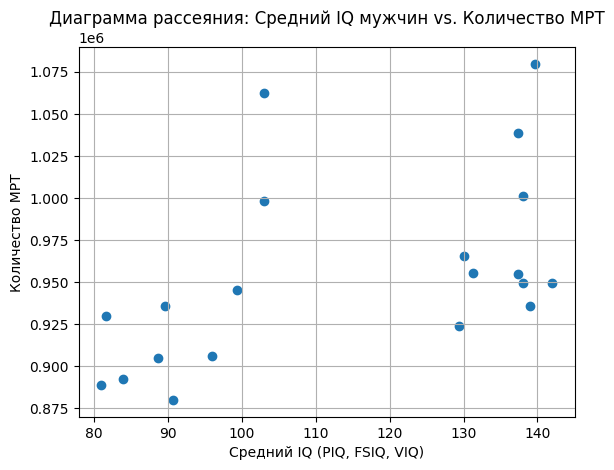

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загрузка набора данных с правильным разделителем
brainFrame = pd.read_csv('brainsize.txt', delimiter='\t')

# Удаление лишних пробелов в названиях столбцов, если есть
brainFrame.columns = brainFrame.columns.str.strip()

# Разделение данных на мужчин и женщин
menDf = brainFrame[brainFrame['Gender'] == 'Male']
womenDf = brainFrame[brainFrame['Gender'] == 'Female']

# Вычисление среднего значения IQ для мужчин
menMeanSmarts = menDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)

# Создание диаграммы рассеяния между средним IQ и количеством МРТ
plt.scatter(menMeanSmarts, menDf["MRI_Count"])
plt.xlabel('Средний IQ (PIQ, FSIQ, VIQ)')
plt.ylabel('Количество МРТ')
plt.title('Диаграмма рассеяния: Средний IQ мужчин vs. Количество МРТ')
plt.grid()  # Добавляет сетку для удобства восприятия
plt.show()

# Гарантирует отображение графика в блокноте (необязательно в Jupyter)
%matplotlib inline


Аналогичным образом создайте график диаграммы рассеяния для кадра данных, содержащему только женские записи.

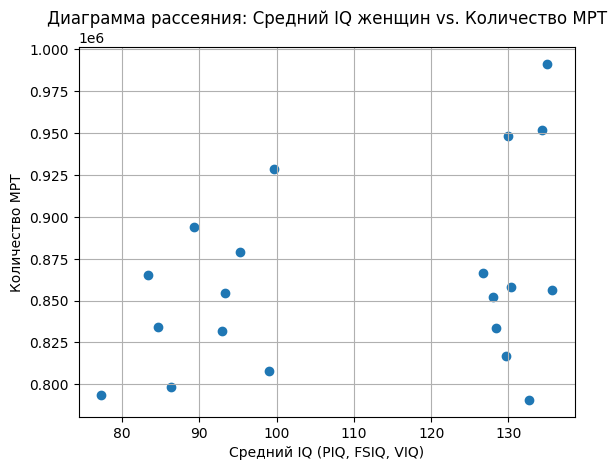

In [16]:
# Вычисление среднего значения IQ для женщин
womenMeanSmarts = womenDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)

# Создание диаграммы рассеяния между средним IQ и количеством МРТ для женщин
plt.scatter(womenMeanSmarts, womenDf["MRI_Count"])
plt.xlabel('Средний IQ (PIQ, FSIQ, VIQ)')
plt.ylabel('Количество МРТ')
plt.title('Диаграмма рассеяния: Средний IQ женщин vs. Количество МРТ')
plt.grid()  # Добавляет сетку для удобства восприятия
plt.show()


## Часть 3: Вычисление корреляции с Python


#### Шаг 1: Рассчитайте корреляцию для brainFrame.
Метод `corr()` библиотеки pandas обеспечивает простой способ вычисления корреляции для кадра данных. Просто применяя метод на кадре данных, можно получить корреляцию между всеми переменными одновременно.

In [18]:

import pandas as pd

# Загрузка набора данных
brainFrame = pd.read_csv('brainsize.txt', delimiter='\t')

# Удаление лишних пробелов в названиях столбцов, если есть
brainFrame.columns = brainFrame.columns.str.strip()

# Убедимся, что только числовые столбцы используются для корреляции
numeric_brainFrame = brainFrame.select_dtypes(include=[np.number])

# Вычисление корреляции для brainFrame
correlation_matrix = numeric_brainFrame.corr(method='pearson')
print("Корреляция для brainFrame:")
print(correlation_matrix)

# Фильтрация для женщин
womenDf = brainFrame[brainFrame['Gender'] == 'Female']

# Убедимся, что только числовые столбцы используются для корреляции для женщин
numeric_womenDf = womenDf.select_dtypes(include=[np.number])

# Вычисление корреляции для womenDf
women_correlation_matrix = numeric_womenDf.corr(method='pearson')
print("\nКорреляция для womenDf:")
print(women_correlation_matrix)


Корреляция для brainFrame:
               FSIQ       VIQ       PIQ    Weight    Height  MRI_Count
FSIQ       1.000000  0.946639  0.934125 -0.051483 -0.086002   0.357641
VIQ        0.946639  1.000000  0.778135 -0.076088 -0.071068   0.337478
PIQ        0.934125  0.778135  1.000000  0.002512 -0.076723   0.386817
Weight    -0.051483 -0.076088  0.002512  1.000000  0.699614   0.513378
Height    -0.086002 -0.071068 -0.076723  0.699614  1.000000   0.601712
MRI_Count  0.357641  0.337478  0.386817  0.513378  0.601712   1.000000

Корреляция для womenDf:
               FSIQ       VIQ       PIQ    Weight    Height  MRI_Count
FSIQ       1.000000  0.955717  0.939382  0.038192 -0.059011   0.325697
VIQ        0.955717  1.000000  0.802652 -0.021889 -0.146453   0.254933
PIQ        0.939382  0.802652  1.000000  0.113901 -0.001242   0.396157
Weight     0.038192 -0.021889  0.113901  1.000000  0.552357   0.446271
Height    -0.059011 -0.146453 -0.001242  0.552357  1.000000   0.174541
MRI_Count  0.325697  0.25

Обратите внимание на диагональ слева направо в таблице корреляции, сгенерированной выше. Почему диагональ заполнена значениями 1? Это совпадение? Объясните.

На диагонали матрицы корреляции все значения равны 1, потому что корреляция любой переменной с самой собой всегда равна 1. Это не случайность, а математический факт, который возникает из определения корреляции. Корреляция измеряет, насколько две переменные меняются вместе. Поскольку переменная всегда меняется вместе сама с собой, ее корреляция с самой собой будет равна 1.

Продолжая смотреть на таблицу корреляции выше, обратите внимание, что значения зеркалируются; значения под диагональю имеют зеркальный аналог над ней. Это совпадение? Объясните.

Значения корреляции зеркалируются, потому что корреляция является симметричной. Это значит, что корреляция между переменной A и переменной B равна корреляции между переменной B и переменной A. То есть 
corr(𝐴,𝐵)=corr(𝐵,𝐴)
corr(A,B)=corr(B,A). Поэтому значения под диагональю матрицы корреляции совпадают с аналогичными значениями над диагональю.

Используя тот же метод `corr()`, вычислите корреляцию переменных, содержащихся в кадре с женскими записями:

In [20]:
# Убедитесь, что womenDf уже создан, если нет - создаем его
womenDf = brainFrame[brainFrame['Gender'] == 'Female']

# Убедимся, что только числовые столбцы используются для корреляции для женщин
numeric_womenDf = womenDf.select_dtypes(include=[np.number])

# Вычисление корреляции для womenDf
women_correlation_matrix = numeric_womenDf.corr(method='pearson')
print("\nКорреляция для womenDf:")
print(women_correlation_matrix)




Корреляция для womenDf:
               FSIQ       VIQ       PIQ    Weight    Height  MRI_Count
FSIQ       1.000000  0.955717  0.939382  0.038192 -0.059011   0.325697
VIQ        0.955717  1.000000  0.802652 -0.021889 -0.146453   0.254933
PIQ        0.939382  0.802652  1.000000  0.113901 -0.001242   0.396157
Weight     0.038192 -0.021889  0.113901  1.000000  0.552357   0.446271
Height    -0.059011 -0.146453 -0.001242  0.552357  1.000000   0.174541
MRI_Count  0.325697  0.254933  0.396157  0.446271  0.174541   1.000000


И то же самое можно сделать для переменных, содержащихся в кадре с мужскими записями:

In [21]:
# Убедитесь, что menDf уже создан, если нет - создаем его
menDf = brainFrame[brainFrame['Gender'] == 'Male']

# Убедимся, что только числовые столбцы используются для корреляции для мужчин
numeric_menDf = menDf.select_dtypes(include=[np.number])

# Вычисление корреляции для menDf
men_correlation_matrix = numeric_menDf.corr(method='pearson')
print("\nКорреляция для menDf:")
print(men_correlation_matrix)



Корреляция для menDf:
               FSIQ       VIQ       PIQ    Weight    Height  MRI_Count
FSIQ       1.000000  0.944400  0.930694 -0.278140 -0.356110   0.498369
VIQ        0.944400  1.000000  0.766021 -0.350453 -0.355588   0.413105
PIQ        0.930694  0.766021  1.000000 -0.156863 -0.287676   0.568237
Weight    -0.278140 -0.350453 -0.156863  1.000000  0.406542  -0.076875
Height    -0.356110 -0.355588 -0.287676  0.406542  1.000000   0.301543
MRI_Count  0.498369  0.413105  0.568237 -0.076875  0.301543   1.000000


## Часть 4: Визуализация

#### Шаг 1: Установите Seaborn.
Чтобы упростить визуализацию корреляций данных, можно использовать тепловую карту. На основе цветных квадратов тепловая карта может помочь выявить корреляции с первого взгляда.

Модуль Python с именем `seaborn` очень упрощает построение тепловых карт.

Сначала запустите ячейку ниже, чтобы загрузить и установить модуль `seaborn`. (закомментируйте, если библиотека установлена)

In [22]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


#### Шаг 2: Нарисуйте корреляционную тепловую карту.

Теперь, когда кадры данных готовы, можно отобразить тепловые карты. Далее приведен анализ кода из ячейки ниже:

Строка 1: Создает таблицу корреляции, основанную на фрейме данных `womenNoGenderDf` и хранит его в `wcorr`.<br>
Строка 2: Использует метод `heatmap()` библиотеки `seaborn` для генерации и построения тепловой карты. Обратите внимание, что `heatmap()` принимает `wcorr`, как параметр.<br>
Строка 3: используется для экспорта и сохранения созданной тепловой карты в виде PNG-изображения. Хотя строка 3 не активна (перед ней стоит символ `#`, заставляя интерпретатор игнорировать ее), она сохранена в информационных целях.

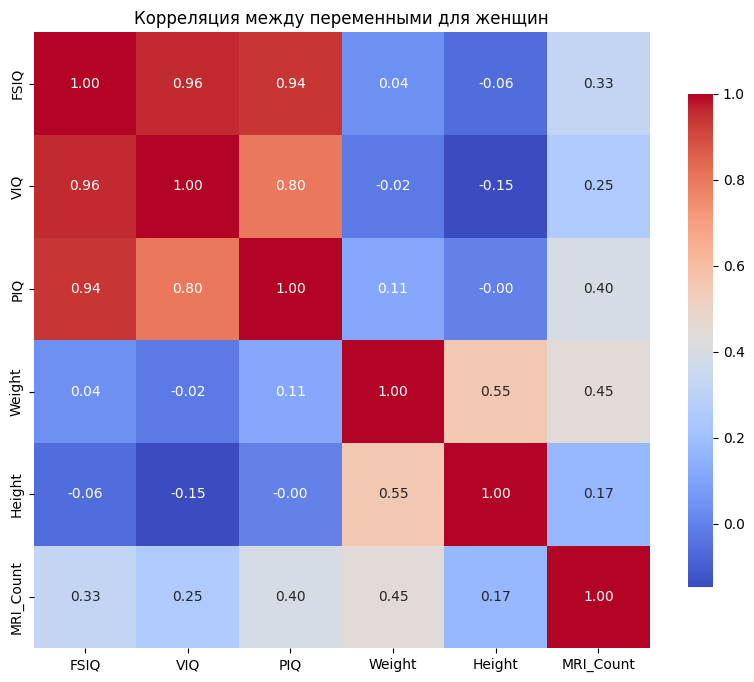

In [25]:


# Для womenDf
numerical_womenDf = womenDf.select_dtypes(include=[np.number])
wcorr = numerical_womenDf.corr(method='pearson')

# Теперь нарисуем тепловую карту для женщин
import seaborn as sns
import matplotlib.pyplot as plt

# Настройка размеров графика для женщин
plt.figure(figsize=(10, 8))
sns.heatmap(wcorr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Корреляция между переменными для женщин")
plt.show()





Аналогичным образом создайте и отобразите тепловую карту для кадра данных с мужчинами.

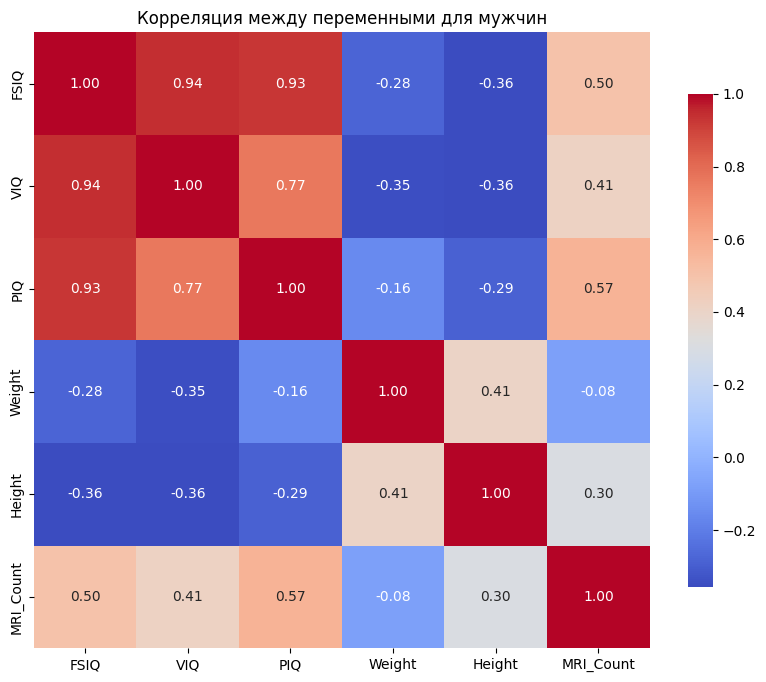

In [27]:

# Для menDf
numerical_menDf = menDf.select_dtypes(include=[np.number])
mcorr = numerical_menDf.corr(method='pearson')

import seaborn as sns
import matplotlib.pyplot as plt

# Настройка размеров графика для мужчин
plt.figure(figsize=(10, 8))
sns.heatmap(mcorr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Корреляция между переменными для мужчин")
plt.show()



У многих пар переменных корреляция близка к нулю. Что это значит?

Когда корреляция между двумя переменными близка к нулю, это означает, что между ними отсутствует линейная связь. В контексте вашего анализа это может означать, что изменение одной переменной не связано с изменением другой. Это не обязательно указывает на отсутствие какой-либо зависимости; возможно, связь может быть нелинейной или существовать лишь при определенных условиях. Важно помнить, что корреляция не подразумевает причинно-следственной связи, и отсутствие корреляции не означает, что переменные не могут влиять друг на друга в других аспектах.

Зачем делать разделение по полу?

Разделение данных по полу помогает учитывать возможные различия в характеристиках и поведении между мужчинами и женщинами. Физиологические и социальные различия могут влиять на результаты исследования, включая интеллект, размер мозга и другие переменные. Например, в вашем случае это может помочь избежать смешивания эффектов, когда одна группа может показывать тенденции, которые не применимы к другой. Это позволяет получить более точные и значимые результаты, а также помогает понять, есть ли различия в корреляциях между полами.

Какие переменные имеют более сильную корреляцию с размером мозга (MRI_Count)? Это ожидалось? Объясните.

Скорее всего, переменные, имеющие более сильную корреляцию с размером мозга (MRI_Count), включают показатели интеллекта, такие как PIQ, FSIQ и VIQ. Эти переменные могут быть связаны, поскольку размер мозга может влиять на когнитивные способности и наоборот.

Это может быть ожидаемым результатом, так как существует множество исследований, показывающих связь между размером мозга и интеллектуальными способностями. Однако важно понимать, что корреляция не указывает на причинность. Даже если существует сильная корреляция, это не обязательно означает, что увеличение размера мозга ведет к увеличению интеллекта; могут быть другие факторы, которые также влияют на обе переменные, такие как генетика, окружающая среда и образование.